<a href="https://colab.research.google.com/github/IamAtreus/00-Tensorflow/blob/PyTorch/01_PyTorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import torch
from torch import nn
import torchvision as tv 
import torchaudio as ta 
import matplotlib.pyplot as plt

print(torch.__version__)

1.12.1+cu113


## 1. Data (preparing and loading)
* Speadssheet
* images
* video
* audio
* text
* Even DNA

Can be converted to numbers, it can be used.

# starting with Y=a+bx


In [2]:
weight = 0.7 # a
bias = 0.3 # b

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1) # X in ml is always uppercase
y = weight * X + bias

X[:10], y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [3]:
len(X), len(y)


(50, 50)

## *Splitting data into training and test sets*

In [4]:
# Creating data spilt for training and test

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)


(40, 40, 10, 10)

In [5]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):

  plt.figure(figsize=(10, 7))

  plt.scatter(train_data, train_labels, c="b", s=4, label="training data")

  plt.scatter(test_data, test_labels, c="g", s=4, label="test data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="predictions")
  
  plt.legend(prop={"size": 14})

  

  



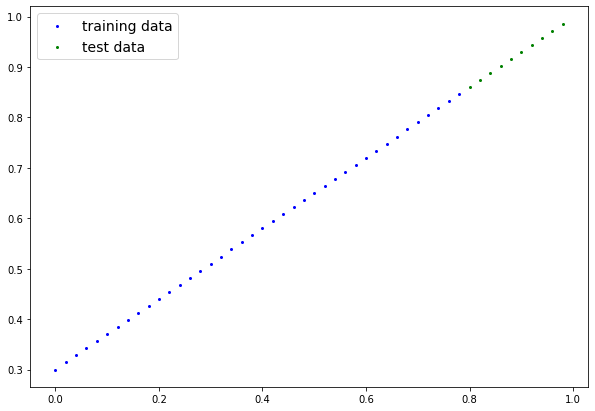

In [6]:
plot_predictions();

## Building a model

In [7]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                           requires_grad=True,
                                           dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias # y=a+bx



### PyTorch model building essentials

* torch.nn - contains all of the buildings for cpu graph
* torch.nn.Parameter - what parameter model try and learn
* torch.nn.Moduel - the base class for nn 
* torch.optim - optimizers
* def forward() - base moduels for all nn.Modules


In [8]:
# create a random seed

torch.manual_seed(42)

# create a instance

model_0 = LinearRegressionModel()

# check the prem

list(model_0.parameters())



[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [9]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Predictions on model

In [17]:
# using torch.interence_mode()

with torch.inference_mode(): # context manager
  y_pred = model_0(X_test)

y_pred

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

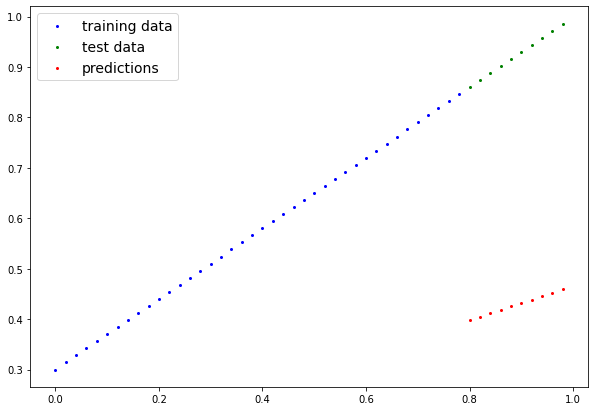

In [11]:
plot_predictions(predictions=y_preds)

### Training the model intuition

In [12]:
list(model_0.parameters())


[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [13]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [15]:
# setup loss function. For images nn.BCELoss can be used with better results

loss_fn = nn.L1Loss()

# setup an optimizer
# algo: stochastic gradient decent.
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.0001)





### building a trainingloop and a training loop in PyTorch

0. Loop the data
1. forward propagation
2. Calc the loss, compagre forward predicition to ground truth
3. optimizer zero grad
4. Loss backward trhrough the network. ( **backpropagation** )
5. Optimizer step. ( **gradient decent** )

In [18]:
epochs = 1
# 0.
for epoch in range(epochs):
  model_0.train()

  # 1.
  y_pred = model_0(X_train)
  
  # 2.
  loss = loss_fn(y_pred, y_train)

  # 3.
  optimizer.zero_grad()

  # 4.
  loss.backward()

  # 5.
  optimizer.step()

  #model_0.eval()
